# TRUNG BÌNH GIÁ (PRICE) VÀ PHẦN TRĂM THAY ĐỔI (CHANGE %)

Thư viện sử dụng:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ipywidgets as widgets
from IPython.display import display

Đọc dữ liệu từ file

In [2]:
df = pd.read_csv("merged_data.csv")
df.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.        float64
Change %    float64
XSTC         object
dtype: object

## 1/ Trung bình bao lâu thì giá cổ phiếu các ngân hàng đạt giá trị trung bình? nói lên điều gì?


### Biểu đồ biến động giá cổ phiếu, giá trị trung bình giá cổ phiếu của các ngân hàng:

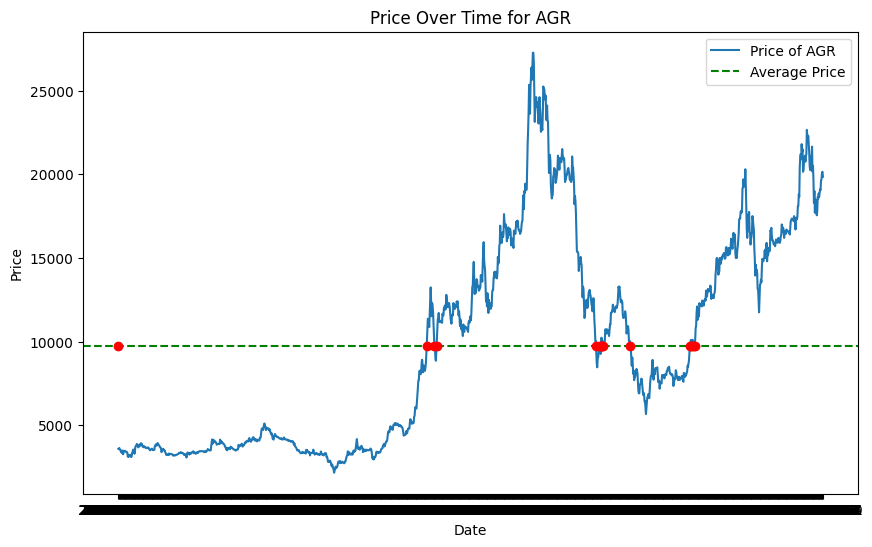

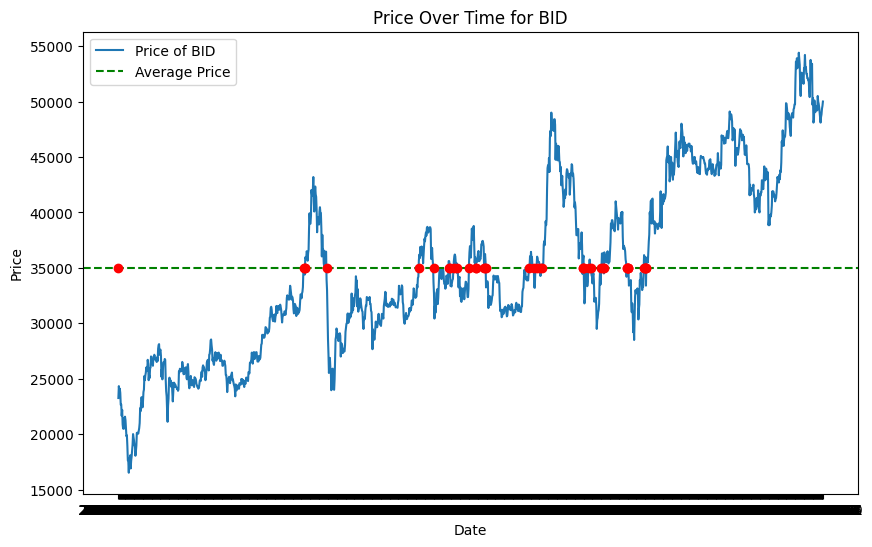

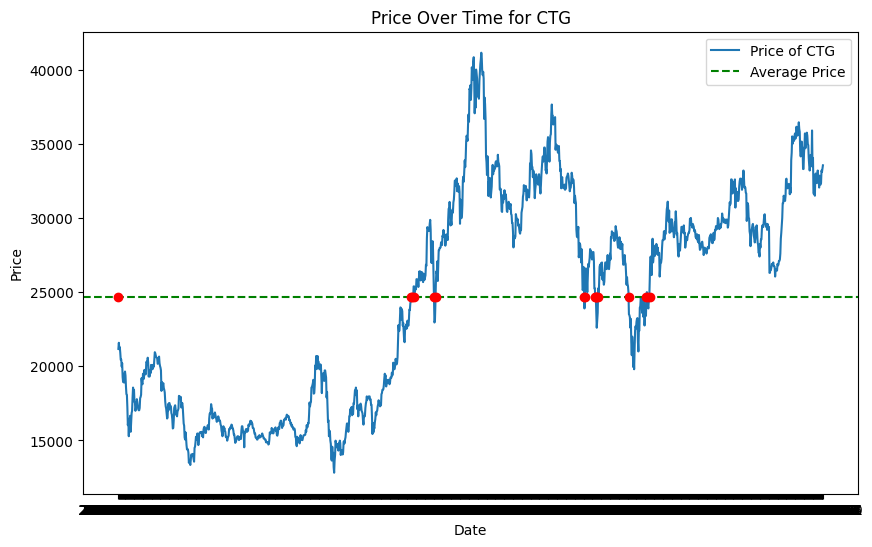

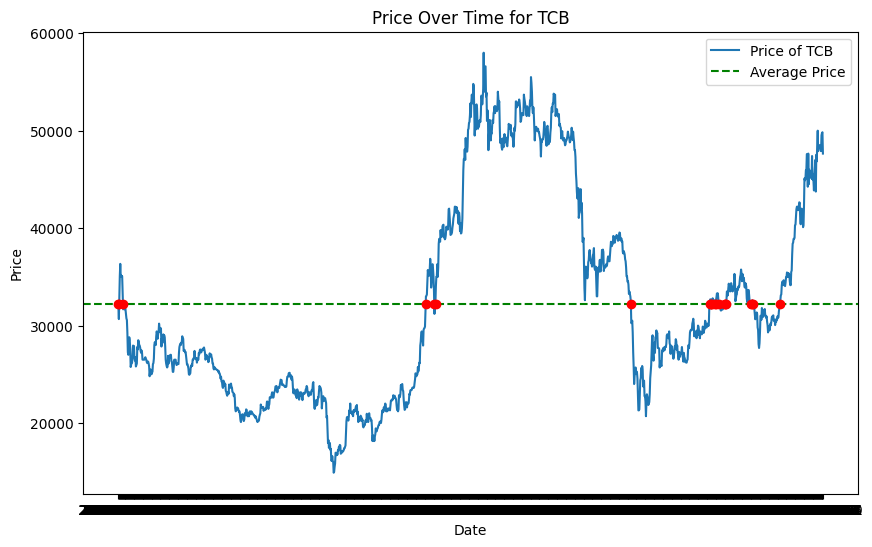

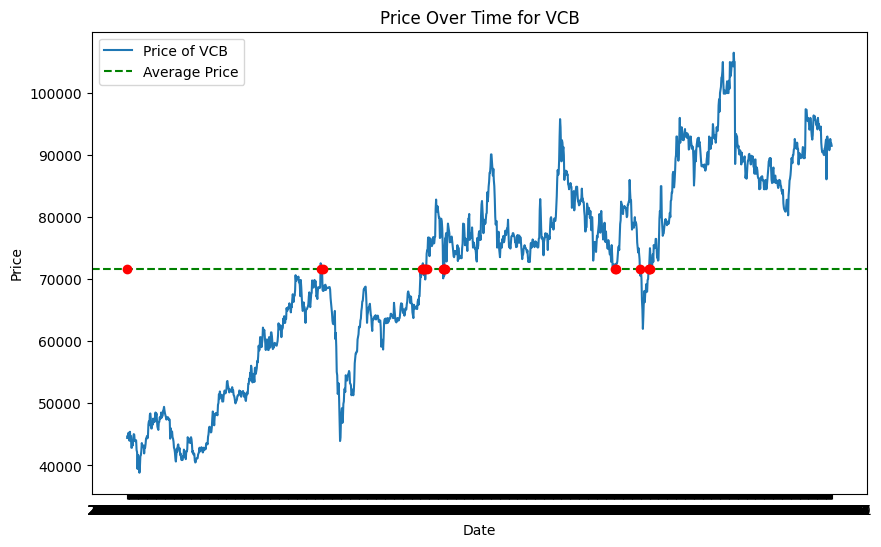

C:\Users\Admin\AppData\Local\Temp\ipykernel_17060\1402425294.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=average_price.values, x=average_price.index, palette='viridis')


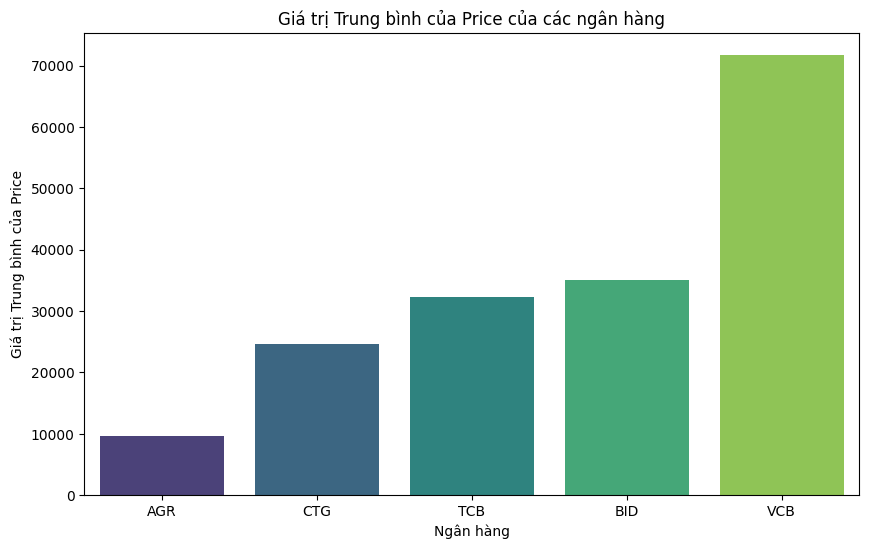

In [14]:
banks = df['XSTC'].unique()
days_banks = []

# Plot separate line charts for each bank
for bank in banks:
    bank_data = df[df['XSTC'] == bank]
    average_price = bank_data['Price'].mean()
    days_above_average = (bank_data['Price'] > average_price).sum()
    days_below_average = (bank_data['Price'] < average_price).sum()
    # Tìm các điểm cắt giữa giá cổ phiếu và đường trung bình
    crossing_points = bank_data[(bank_data['Price'] > average_price) != (bank_data['Price'] > average_price).shift(1)]

    y_value = np.full((crossing_points.shape[0],), average_price)

    days_banks.append([days_above_average, days_below_average, (pd.to_datetime(crossing_points['Date'])).diff().mean(),crossing_points.shape[0], average_price, bank])
    plt.figure(figsize=(10, 6))
    plt.plot(bank_data['Date'], bank_data['Price'], label=f'Price of {bank}')
    plt.axhline(y=average_price, color='green', linestyle='--', label='Average Price')

    plt.scatter(crossing_points['Date'], y_value, color='red', zorder=5)

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Price Over Time for {bank}')
    plt.legend()

# Show the plot after looping through all banks
plt.show()

# Tính giá trị trung bình của price cho từng ngân hàng
average_price = df.groupby('XSTC')['Price'].mean().sort_values()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(y=average_price.values, x=average_price.index, palette='viridis')

# Thiết lập tiêu đề và nhãn
plt.ylabel('Giá trị Trung bình của Price')
plt.xlabel('Ngân hàng')
plt.title('Giá trị Trung bình của Price của các ngân hàng')

# Hiển thị biểu đồ
plt.show()


Giá trung bình (price) có tác dụng làm điểm tham chiếu để so sánh với giá cổ phiếu hiện tại. Nếu giá cổ phiếu hiện tại cao hơn giá trị trung bình, có thể cho thấy sự tăng trưởng hoặc biến động ngắn hạn; ngược lại, nếu giá cổ phiếu thấp hơn giá trị trung bình, có thể cho thấy sự giảm giá(cơ hội mua vào).

Giá trị trung bình là 1 đại lượng phản chiếu 1 phần giá trị thực của cổ phiếu. Nếu giá trị trung bình cao hơn thì có thể giá trị thực của cổ phiếu cũng cao hơn.

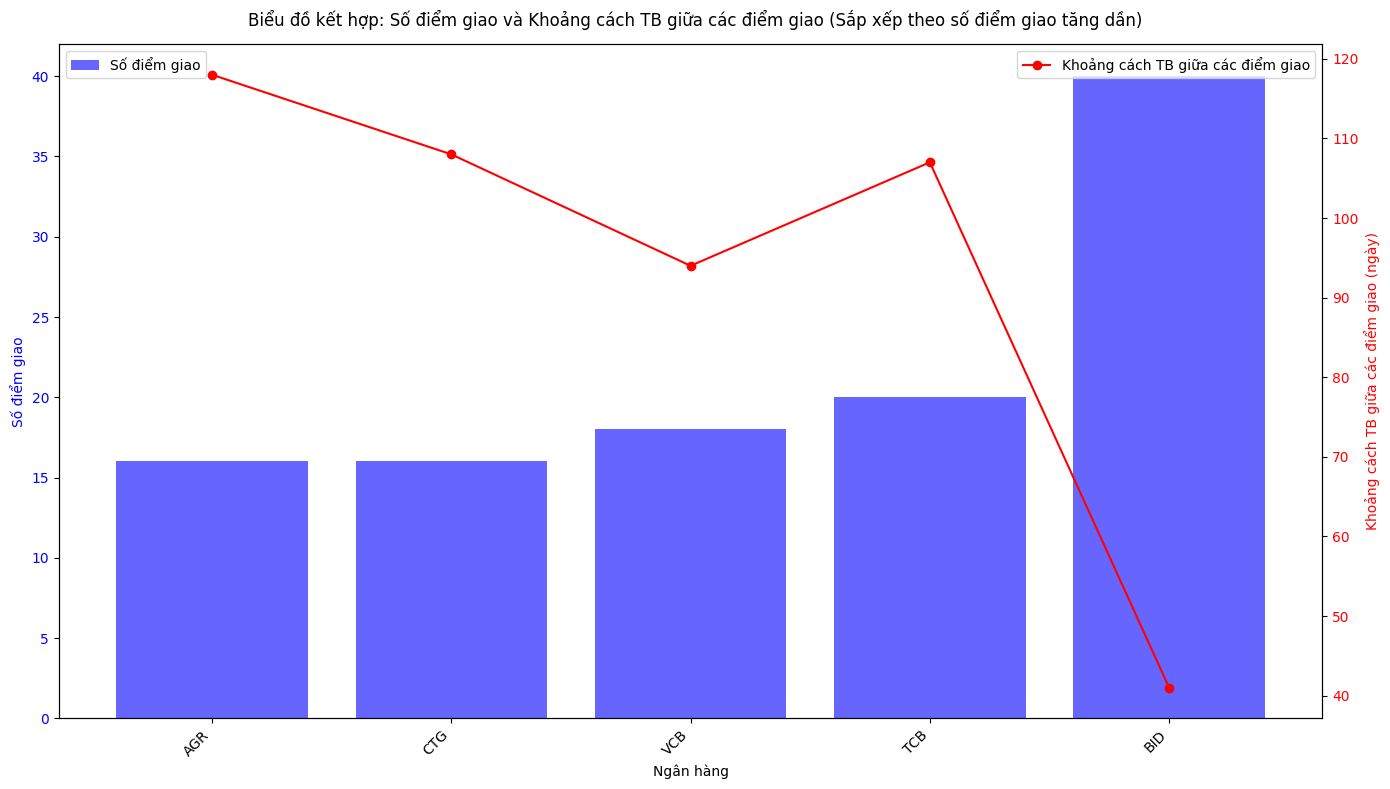

In [16]:
# Sắp xếp số điểm giao theo thứ tự tăng dần
sorted_days_banks = sorted(days_banks, key=lambda x: x[3])

# Tạo danh sách chứa tên các ngân hàng
bank_names = [item[5] for item in sorted_days_banks]

# Tạo danh sách chứa các giá trị cần vẽ
crossing_points_count = [item[3] for item in sorted_days_banks]
mean_date_diff = [item[2] for item in sorted_days_banks]

# Thiết lập biểu đồ
fig, ax1 = plt.subplots(figsize=(14, 8))

# Vẽ biểu đồ cột cho số điểm giao
ax1.bar(bank_names, crossing_points_count, color='b', alpha=0.6, label='Số điểm giao')
ax1.set_xlabel('Ngân hàng')
ax1.set_ylabel('Số điểm giao', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Thiết lập trục x
ax1.set_xticks(range(len(bank_names)))
ax1.set_xticklabels(bank_names, rotation=45, ha='right')

# Tạo trục y thứ hai để vẽ biểu đồ đường cho khoảng cách trung bình giữa các điểm giao
ax2 = ax1.twinx()
ax2.plot(bank_names, mean_date_diff, color='r', marker='o', linestyle='-', label='Khoảng cách TB giữa các điểm giao')
ax2.set_ylabel('Khoảng cách TB giữa các điểm giao (ngày)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Thêm tiêu đề và legend
fig.suptitle('Biểu đồ kết hợp: Số điểm giao và Khoảng cách TB giữa các điểm giao (Sắp xếp theo số điểm giao tăng dần)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


Số điểm giao và trung bình khoảng cách các điểm giao tỉ lệ nghịch nhau.

Tuy nhiên trên biểu đồ có 1 điểm Outline là TCB


## Biến động của Change (%) theo thời gian của các ngân hàng

Ngân hàng có sự thay đổi trung bình lớn nhất: TCB với giá trị trung bình 0.48%
Ngân hàng: AGR với giá trị trung bình 0.27%
Ngân hàng: BID với giá trị trung bình 0.17%
Ngân hàng: CTG với giá trị trung bình 0.26%
Ngân hàng: TCB với giá trị trung bình 0.48%
Ngân hàng: VCB với giá trị trung bình 0.16%


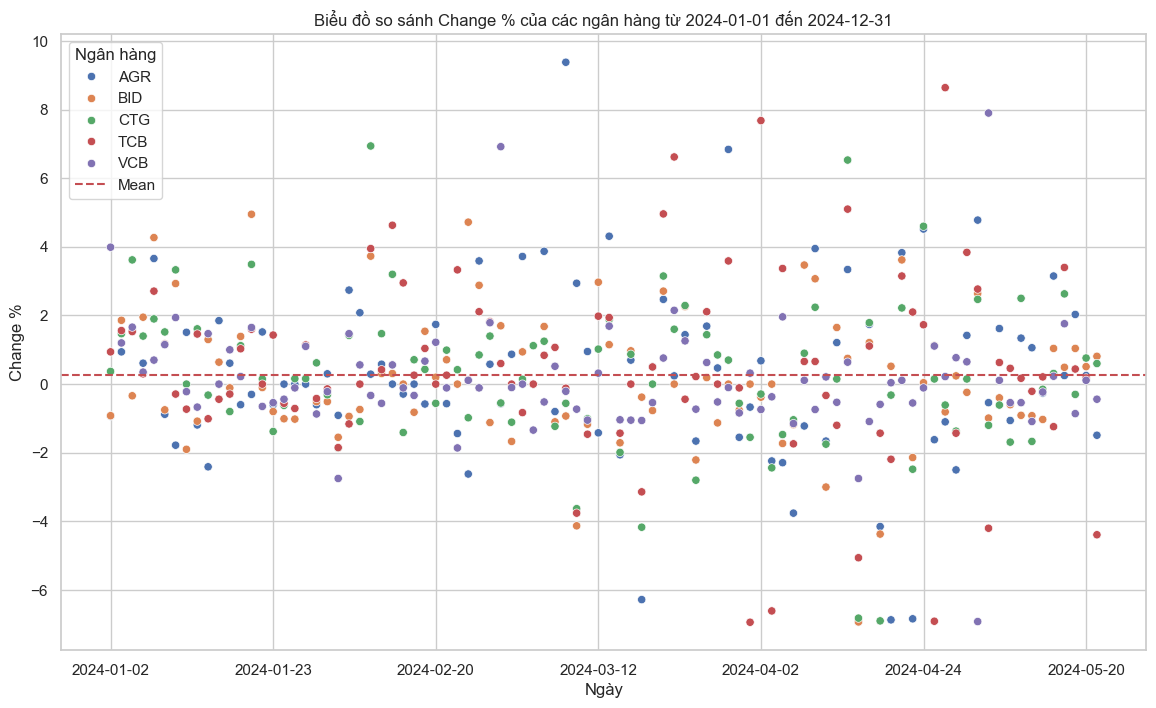

In [33]:
# Đặt khoảng thời gian
year = '2024'
start_date = year+'-01-01'
end_date = year+'-12-31'

# Lọc dữ liệu theo khoảng thời gian
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
filtered_df = df[mask]

# Thiết lập phong cách cho biểu đồ
sns.set(style='whitegrid')

# Vẽ biểu đồ phân tán
plt.figure(figsize=(14, 8))
scatter_plot = sns.scatterplot(data=filtered_df, x='Date', y='Change %', hue='XSTC', palette='deep')

# Thiết lập các nhãn và tiêu đề
scatter_plot.set_ylabel('Change %')
scatter_plot.set_xlabel('Ngày')
scatter_plot.set_title('Biểu đồ so sánh Change % của các ngân hàng từ ' + start_date + ' đến ' + end_date)

# Tính giá trị trung bình của Change % cho từng ngân hàng
average_change = filtered_df.groupby('XSTC')['Change %'].mean()
mean_value = average_change.mean()
# Xác định ngân hàng có giá trị trung bình lớn nhất
max_avg_change_bank = average_change.idxmax()
max_avg_change_value = average_change.max()

print(f"Ngân hàng có sự thay đổi trung bình lớn nhất: {max_avg_change_bank} với giá trị trung bình {max_avg_change_value:.2f}%")
for bank, change_value in average_change.items():
    print(f"Ngân hàng: {bank} với giá trị trung bình {change_value:.2f}%")
# Giảm số lượng ticks trên trục x để dễ nhìn hơn
scatter_plot.xaxis.set_major_locator(plt.MaxNLocator(10))
scatter_plot.yaxis.set_major_locator(plt.MaxNLocator(10))

plt.axhline(y=mean_value, color='r', linestyle='--', label='Mean')

# Hiển thị legend
plt.legend(title='Ngân hàng', loc='upper left')

# Hiển thị biểu đồ
plt.show()


2018:
Ngân hàng: AGR với giá trị trung bình 0.01%
Ngân hàng: BID với giá trị trung bình 0.12%
Ngân hàng: CTG với giá trị trung bình -0.22%
Ngân hàng: TCB với giá trị trung bình -0.16%
Ngân hàng: VCB với giá trị trung bình -0.04%
2019:
Ngân hàng: AGR với giá trị trung bình 0.04%
Ngân hàng: BID với giá trị trung bình 0.14%
Ngân hàng: CTG với giá trị trung bình 0.04%
Ngân hàng: TCB với giá trị trung bình -0.03%
Ngân hàng: VCB với giá trị trung bình 0.22%
2020:
Ngân hàng: AGR với giá trị trung bình 0.39%
Ngân hàng: BID với giá trị trung bình 0.05%
Ngân hàng: CTG với giá trị trung bình 0.24%
Ngân hàng: TCB với giá trị trung bình 0.14%
Ngân hàng: VCB với giá trị trung bình 0.05%
2021:
Ngân hàng: AGR với giá trị trung bình 0.50%
Ngân hàng: BID với giá trị trung bình 0.01%
Ngân hàng: CTG với giá trị trung bình 0.13%
Ngân hàng: TCB với giá trị trung bình 0.21%
Ngân hàng: VCB với giá trị trung bình 0.03%
2022:
Ngân hàng: AGR với giá trị trung bình -0.42%
Ngân hàng: BID với giá trị trung bình 0.05%
Ngân hàng: CTG với giá trị trung bình -0.05%
Ngân hàng: TCB với giá trị trung bình -0.23%
Ngân hàng: VCB với giá trị trung bình 0.02%
2023:
Ngân hàng: AGR với giá trị trung bình 0.35%
Ngân hàng: BID với giá trị trung bình 0.06%
Ngân hàng: CTG với giá trị trung bình 0.01%
Ngân hàng: TCB với giá trị trung bình 0.10%
Ngân hàng: VCB với giá trị trung bình 0.02%
2024:
Ngân hàng: AGR với giá trị trung bình 0.27%
Ngân hàng: BID với giá trị trung bình 0.17%
Ngân hàng: CTG với giá trị trung bình 0.26%
Ngân hàng: TCB với giá trị trung bình 0.48%
Ngân hàng: VCB với giá trị trung bình 0.16%


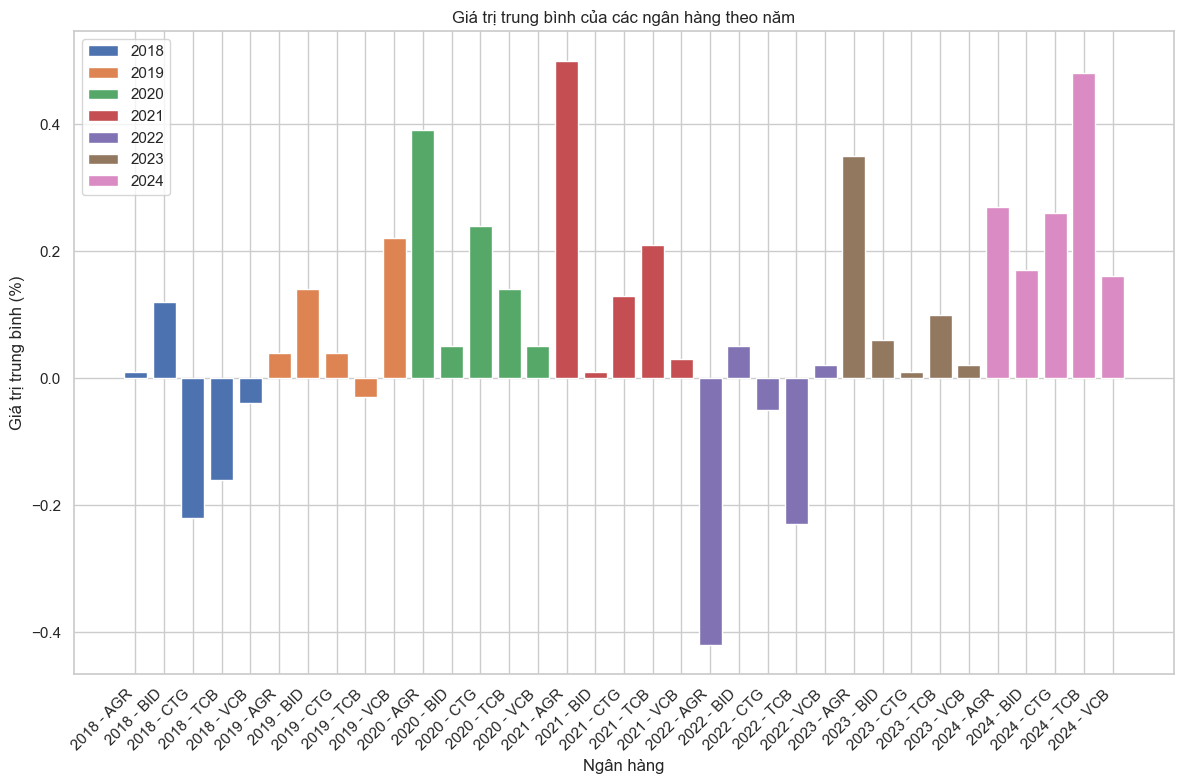

In [36]:
# Dữ liệu giá trị trung bình theo năm cho từng ngân hàng
average_prices = {
    "2018": {
        "AGR": 0.01,
        "BID": 0.12,
        "CTG": -0.22,
        "TCB": -0.16,
        "VCB": -0.04
    },
    "2019": {
        "AGR": 0.04,
        "BID": 0.14,
        "CTG": 0.04,
        "TCB": -0.03,
        "VCB": 0.22
    },
    "2020": {
        "AGR": 0.39,
        "BID": 0.05,
        "CTG": 0.24,
        "TCB": 0.14,
        "VCB": 0.05
    },
    "2021": {
        "AGR": 0.50,
        "BID": 0.01,
        "CTG": 0.13,
        "TCB": 0.21,
        "VCB": 0.03
    },
    "2022": {
        "AGR": -0.42,
        "BID": 0.05,
        "CTG": -0.05,
        "TCB": -0.23,
        "VCB": 0.02
    },
    "2023": {
        "AGR": 0.35,
        "BID": 0.06,
        "CTG": 0.01,
        "TCB": 0.10,
        "VCB": 0.02
    },
    "2024": {
        "AGR": 0.27,
        "BID": 0.17,
        "CTG": 0.26,
        "TCB": 0.48,
        "VCB": 0.16
    }
}

# Tạo biểu đồ cột cho từng năm
plt.figure(figsize=(12, 8))
for year, data in average_prices.items():
    banks = list(data.keys())
    avg_prices = list(data.values())
    plt.bar([f"{year} - {bank}" for bank in banks], avg_prices, label=year)

# Đặt tiêu đề và nhãn trục
plt.title('Giá trị trung bình của các ngân hàng theo năm')
plt.xlabel('Ngân hàng')
plt.ylabel('Giá trị trung bình (%)')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


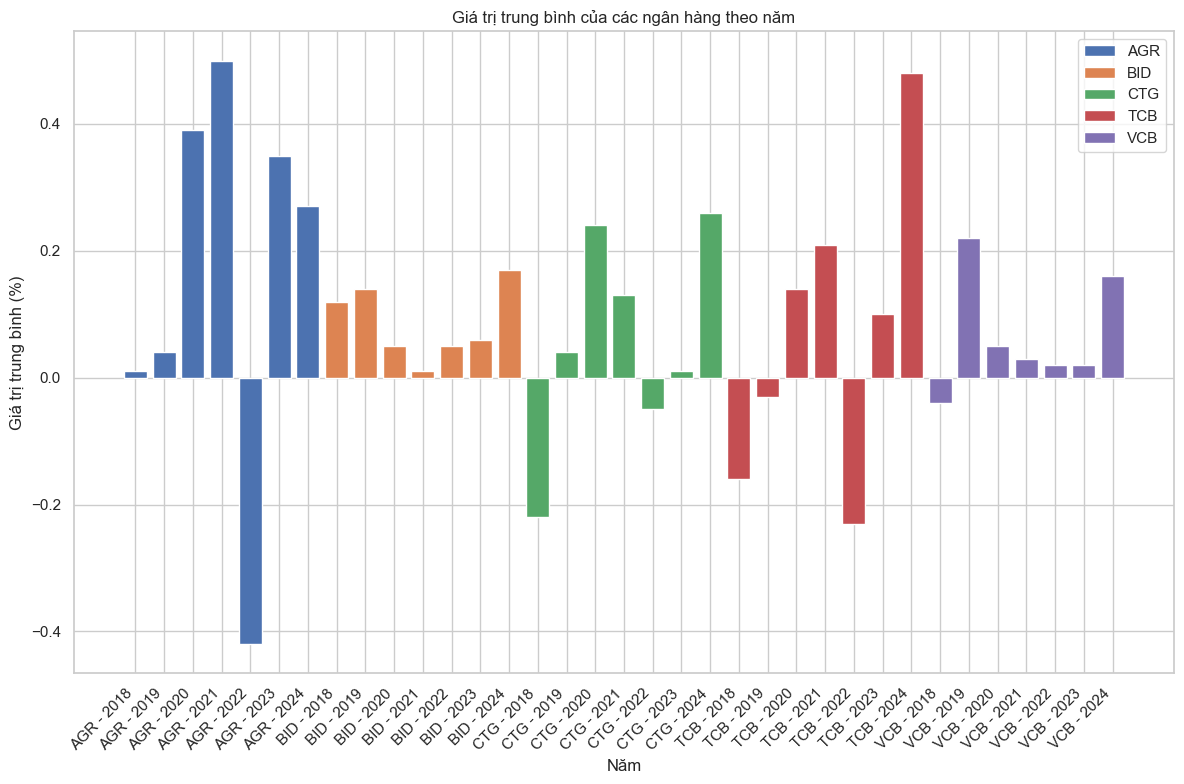

In [37]:
average_prices = {
    "AGR": {
        "2018": 0.01,
        "2019": 0.04,
        "2020": 0.39,
        "2021": 0.50,
        "2022": -0.42,
        "2023": 0.35,
        "2024": 0.27
    },
    "BID": {
        "2018": 0.12,
        "2019": 0.14,
        "2020": 0.05,
        "2021": 0.01,
        "2022": 0.05,
        "2023": 0.06,
        "2024": 0.17
    },
    "CTG": {
        "2018": -0.22,
        "2019": 0.04,
        "2020": 0.24,
        "2021": 0.13,
        "2022": -0.05,
        "2023": 0.01,
        "2024": 0.26
    },
    "TCB": {
        "2018": -0.16,
        "2019": -0.03,
        "2020": 0.14,
        "2021": 0.21,
        "2022": -0.23,
        "2023": 0.10,
        "2024": 0.48
    },
    "VCB": {
        "2018": -0.04,
        "2019": 0.22,
        "2020": 0.05,
        "2021": 0.03,
        "2022": 0.02,
        "2023": 0.02,
        "2024": 0.16
    }
}

# Tạo biểu đồ cột cho từng ngân hàng
plt.figure(figsize=(12, 8))
for bank, data in average_prices.items():
    years = list(data.keys())
    avg_prices = list(data.values())
    plt.bar([f"{bank} - {year}" for year in years], avg_prices, label=bank)

# Đặt tiêu đề và nhãn trục
plt.title('Giá trị trung bình của các ngân hàng theo năm')
plt.xlabel('Năm')
plt.ylabel('Giá trị trung bình (%)')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
